# Haberman's Survival: Exploratory Data Analysis

### -  Aastha Vyas aasthavyas3@gmail.com

**Description**- The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

    305 datapoints
    4 attributes

**Attributes:**
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 
       1 = the patient survived 5 years or longer 
       2 = the patient died within 5 years

In [75]:
# importing packages
import pandas as pd # Data analysis and manipulation 
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=2)

In [2]:
# loading dataset
haberman_df = pd.read_csv("haberman.csv")
haberman_df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
# Number of features

haberman_df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [4]:
# Number of rows(data-points) and columns(features).

haberman_df.shape

(305, 4)

In [5]:
# Renaming the columns
haberman_df = haberman_df.rename(columns = {"30" : "age", "64" : "operation_year", "1" : "axillary_lymph_node",
                                            "1.1" : "survival_status"})
haberman_df.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
# Data summary

haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                    305 non-null int64
operation_year         305 non-null int64
axillary_lymph_node    305 non-null int64
survival_status        305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
# Changing datatype of 'survival_status' from integer to categorical datatype.

haberman_df['survival_status'] = haberman_df['survival_status'].map({1:"yes", 2:"no"})


In [8]:
haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                    305 non-null int64
operation_year         305 non-null int64
axillary_lymph_node    305 non-null int64
survival_status        305 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


## HIGH LEVEL STATISTICS

In [10]:
# Statistical summary

haberman_df.describe()

,age,operation_year,axillary_lymph_node
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [20]:
# Survival Rates // Target Variable Distribution

print(haberman_df['survival_status'].value_counts())
print('--'*30)
print(haberman_df['survival_status'].value_counts(normalize = True))

yes    224
no      81
Name: survival_status, dtype: int64
------------------------------------------------------------
yes    0.734426
no     0.265574
Name: survival_status, dtype: float64


#### OBSERVATIONS:

1. The age of patients vary from 30-83 years. 
            The Median Age of patients is 52.

2. The range of number of positive lymph nodes is 0-52.
           75% of the patients have less than 5 positive lymph nodes 
           25% of the patients have no positive lymph nodes

3. The Survial Status column is imbalanced.
            73% 'yes' 
            27% 'no'



## OBJECTIVE

To predict whether the patient will survive after 5 years or not after undergoning surgery for breast cancer; Based upon the patient's age, year of treatment and the number of positive lymph nodes 

## UNIVARIATE ANALYSIS

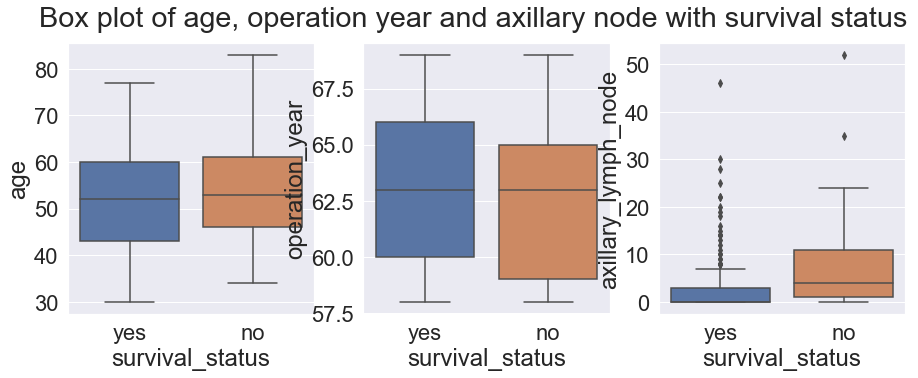

In [88]:
# BOX PLOT

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman_df.columns)[:-1]):
    sns.boxplot( x='survival_status', y=feature, data=haberman_df, ax=axes[idx])
plt.suptitle("Box plot of age, operation year and axillary node with survival status")
plt.show()  

In [45]:
# Counting number of outliers in Survival Status vs Axillary Lymph Node data
Q1 = haberman_df['axillary_lymph_node'].quantile(0.25)
Q3 = haberman_df['axillary_lymph_node'].quantile(0.75)
IQR = Q3 - Q1
print("No. of outliers: ",((haberman_df['axillary_lymph_node'] < (Q1 - 1.5 * IQR)) | (haberman_df['axillary_lymph_node'] > (Q3 + 1.5 * IQR))).sum())

No. of outliers:  40


#### OBSERVATIONS:

1. There are 40 outliers in Survival Status vs Axillary Lymph Node Box Plots
2. No outliers exists in Survival Status vs Age and Survival Status vs Operation Year Box Plots

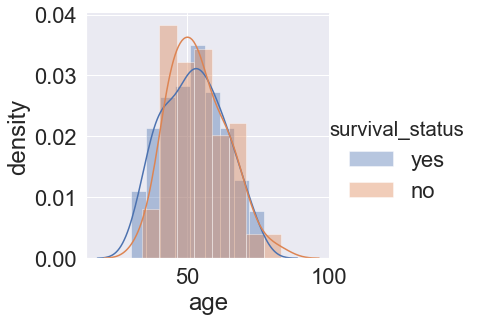

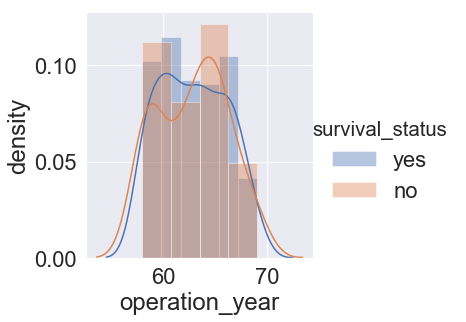

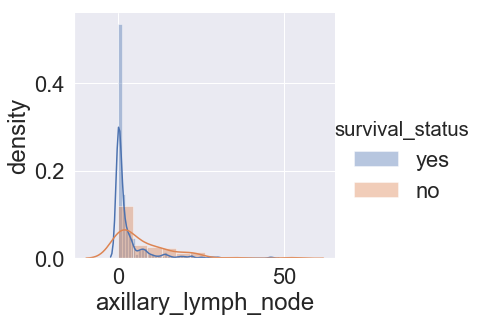

In [97]:
# PDF(Probability Density Function)

for idx, feature in enumerate(list(haberman_df.columns)[:-1]):
    fg = sns.FacetGrid(haberman_df, hue='survival_status', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.ylabel('density')
    plt.show()


#### OBSERVATIONS:

1. Features are massively overlapping 
2. About 58% patients survived who had 0-5 positive lymph nodes 
3. About 12% patients could not survive

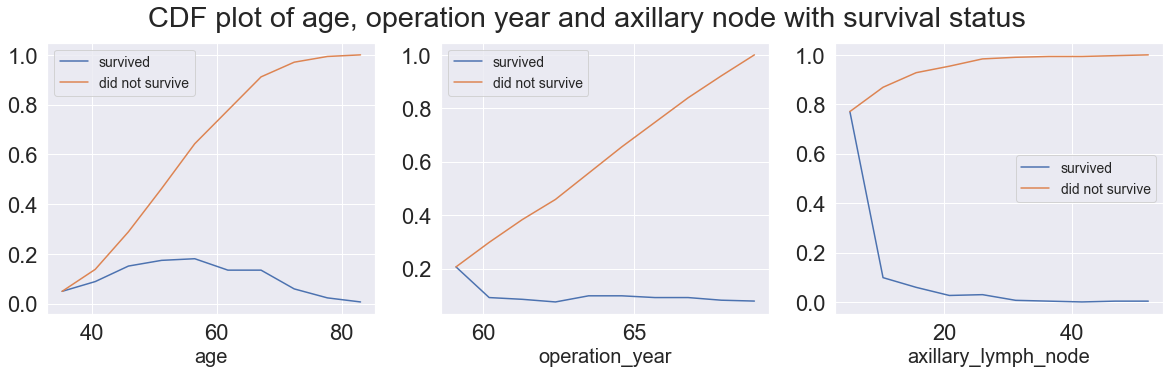

In [83]:
# CDF(Cummulative Distributed Function)

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(haberman_df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    
    counts, bin_edges = np.histogram(haberman_df[feature], bins=10, density=True)
   
    pdf = counts/sum(counts)
 
    cdf = np.cumsum(pdf)
    
    label = ["survived", "did not survive"]
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.legend(label, fontsize=14)
    plt.xlabel(feature, fontsize=20)
plt.suptitle("CDF plot of age, operation year and axillary node with survival status")
plt.show()

#### OBSERVATIONS:

1. 15% of the patients with age less than or equal to 37 survived.
2. The patients treated after 1966 have the slighlty higher chance to surive that the rest. 
3. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

4. Patients who has more than 40 positive lymph nodes did not survive.

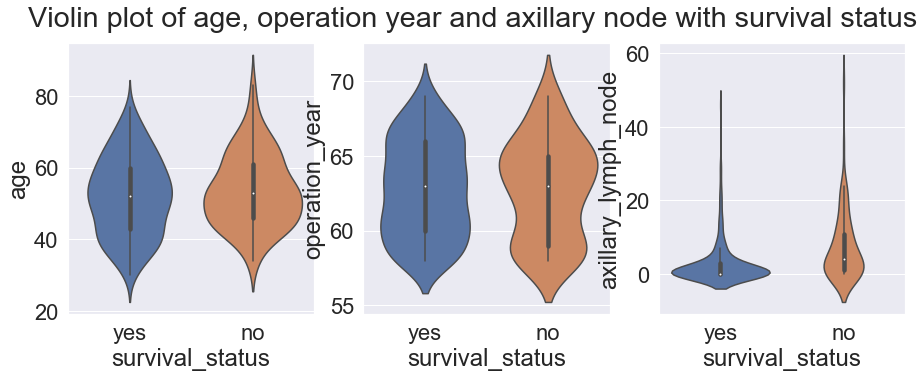

In [81]:
# Violin Plots

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman_df.columns)[:-1]):
    sns.violinplot( x='survival_status', y=feature, data=haberman_df, ax=axes[idx])
plt.suptitle("Violin plot of age, operation year and axillary node with survival status")
plt.show()

#### OBSERVATIONS:

1. The patients treated after 1966 have higher chance to surive than the rest
2. Age group of 30 -34 are in the survival region 
3. Age group of the 78-83 are in death reagion 

## BIVARIATE ANALYSIS

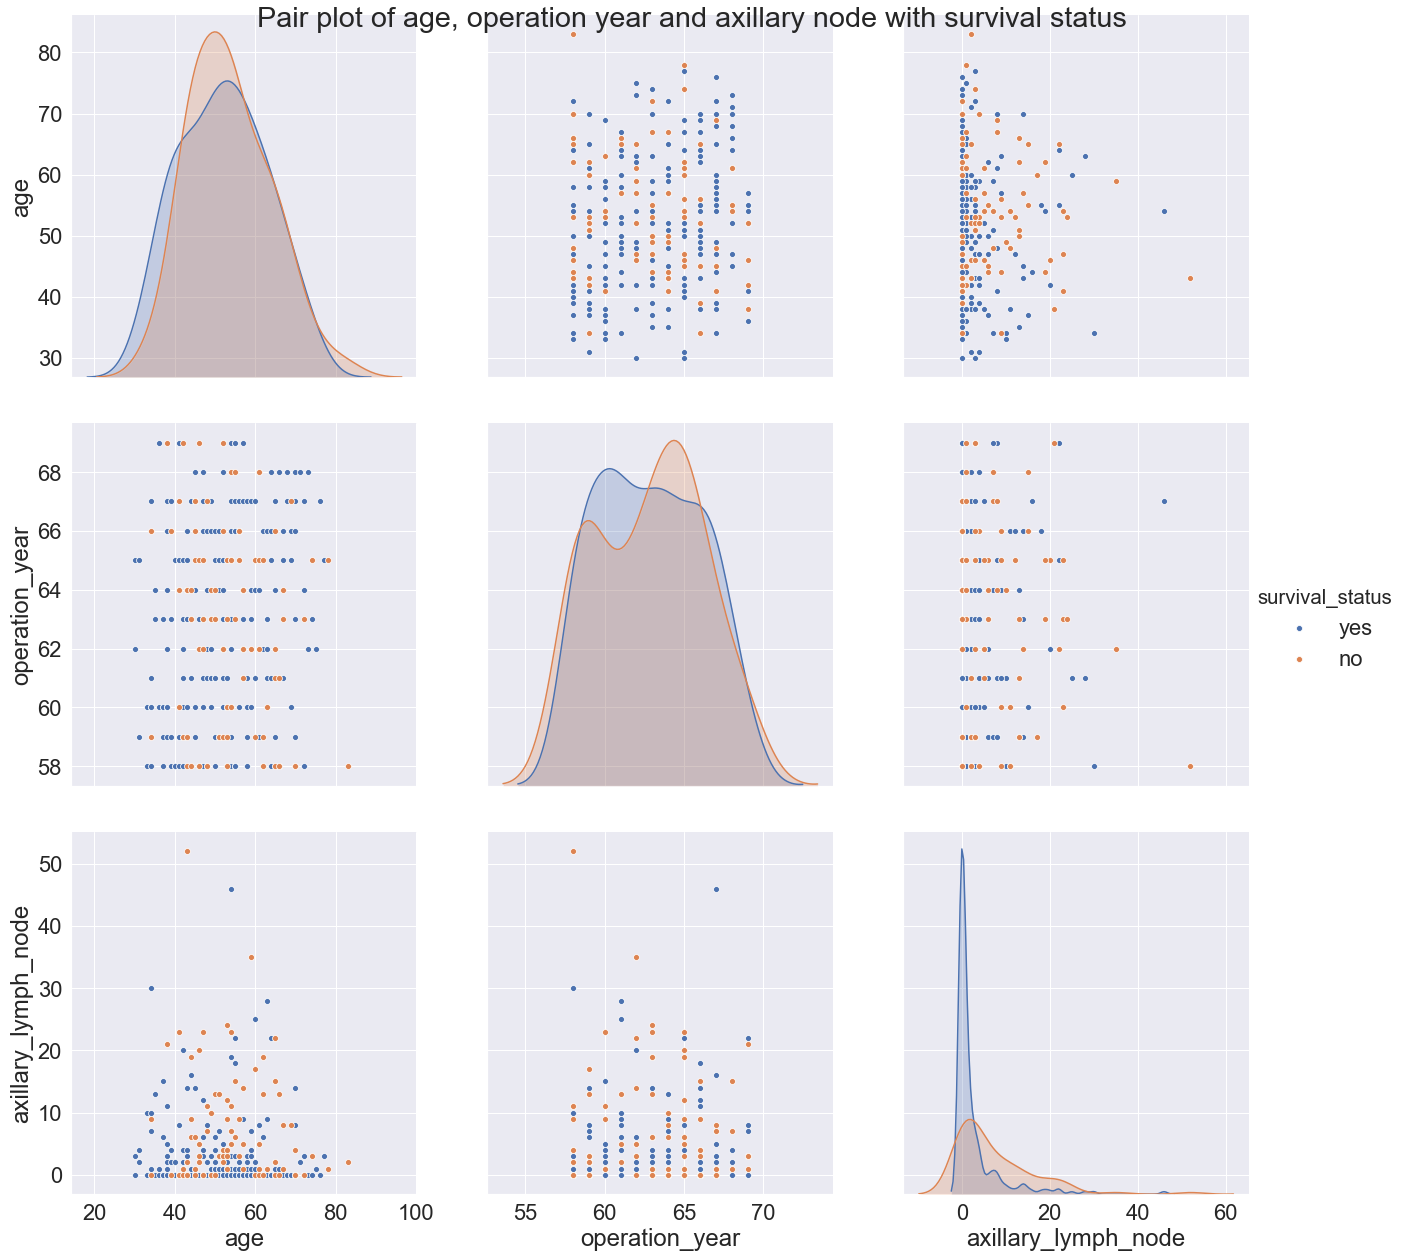

In [80]:
# pair plot

sns.pairplot(haberman_df, hue='survival_status', size=6)
plt.suptitle("Pair plot of age, operation year and axillary node with survival status")
plt.show()

#### OBSERVATIONS:

1. By scattering the data points between year of treatment and positive lymph nodes, we can see the better seperation between the two clases than other scatter plots.
2. 0-5 axillary lymph node patients survived and died as well but the death ratio is less than survive ratio.


## Final Conclusions

**_*The number of lymph nodes have the most impact in the decision feature for the classification of the dataset about the survival status of the patients post surgery.
Those patients who have been diagnosed with very less number of nodes are have higher post surgery survival rates and as the number of nodes increases, the chance of survival drop drastically.*_**

The Dataset is an imbalanced.

*A model with the below conditions for chances of Survival and Non Survival can be built further.*

Survival-

1. Axillary nodes  < 5 : Survive
2. Axillary nodes  < 5 and Treatment Year > 66 : Higher chance to Survival
3. Axillary nodes  < 5 and Treatment Year > 1966 and Age < 34 : Definite chances of Survival

Non Survival-

1. Axillary nodes > 5 Less Survival Chances
2. Axillary nodes > 5 and Treatment Year < 66 : Very less chances of Survival
3. Axillary nodes > 5 and Treatment Year > 1966 and Age < 83 : Almostt no chances of Survival